# Lending Club Case Study

In [160]:
# importing all the required libraries

import numpy as np    
import pandas as pd   
import datetime as dt   

#importing warnings library to ignore all warnings
import warnings
warnings.filterwarnings("ignore")

#importing visualization libraries
import matplotlib.pyplot as plt #visualization
%matplotlib inline

import seaborn as sns  #visualization
      #visualization

In [ ]:

import plotly.offline as py                 #visualization
py.init_notebook_mode(connected=True)       #visualization
import plotly.graph_objs as go              #visualization
import plotly.tools as tls                  #visualization
import plotly.figure_factory as ff    

In [161]:
#reading dataset from csv file
loan = pd.read_csv('loan.csv')

loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [162]:
print("Shape of data",loan.shape)

Shape of data (39717, 111)


In [163]:
# Checking datatype of all columns
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


## Handling Missing Values

In [164]:
def missing_values_percent(df):
  total = df.isnull().sum().sort_values(ascending = False)
  percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
  missing_data  = pd.concat([total, percent], axis=1, keys=['Count', 'Percentage'])
  missing_data = missing_data[missing_data['Percentage'] > 0]
  return missing_data  

In [165]:
mv = missing_values_percent(loan)
mv

,Count,Percentage
verification_status_joint,39717,100.000000
annual_inc_joint,39717,100.000000
mo_sin_old_rev_tl_op,39717,100.000000
mo_sin_old_il_acct,39717,100.000000
bc_util,39717,100.000000
...,...,...
chargeoff_within_12_mths,56,0.140998
revol_util,50,0.125891
tax_liens,39,0.098195
title,11,0.027696


Inference: Most of the features have only NULL values(100%), so we will delete columns having greater than 60% of missing values

## Cleaning the dataset

In [166]:
mv = mv[mv['Percentage']>60]
print("Number of features with more than 60 % of missing values :", len(list(mv.index)))
print('Shape of data before removing missing values : ', loan.shape)
loan = loan.drop(columns=list(mv.index)).copy()
print("Shape of data after removing missing values  : ",loan.shape)

Number of features with more than 60 % of missing values : 57
Shape of data before removing missing values :  (39717, 111)
Shape of data after removing missing values  :  (39717, 54)


In [167]:
# dropping columns where most of the values are same

print(loan['policy_code'].value_counts())
print(loan['initial_list_status'].value_counts())
print(loan['collections_12_mths_ex_med'].value_counts())
print(loan['acc_now_delinq'].value_counts())
print(loan['chargeoff_within_12_mths'].value_counts())
print(loan['delinq_amnt'].value_counts())
print(loan['tax_liens'].value_counts())
print(loan['pymnt_plan'].value_counts())

loan.drop(columns=['policy_code', 'initial_list_status', 'collections_12_mths_ex_med', 'acc_now_delinq', 'delinq_amnt', 'tax_liens', 'chargeoff_within_12_mths', 'pymnt_plan'], inplace=True)

print('\n\nShape after removal' , loan.shape)

1    39717
Name: policy_code, dtype: int64
f    39717
Name: initial_list_status, dtype: int64
0.0    39661
Name: collections_12_mths_ex_med, dtype: int64
0    39717
Name: acc_now_delinq, dtype: int64
0.0    39661
Name: chargeoff_within_12_mths, dtype: int64
0    39717
Name: delinq_amnt, dtype: int64
0.0    39678
Name: tax_liens, dtype: int64
n    39717
Name: pymnt_plan, dtype: int64


Shape after removal (39717, 46)


In [168]:
# dropping application type column since all the application type has same value "INDIVIDUAL"
print(loan['application_type'].value_counts())

loan.drop(columns='application_type', inplace=True)

INDIVIDUAL    39717
Name: application_type, dtype: int64


In [169]:
# dropping columns which are not required in our data analysis
loan.drop(columns=['member_id', 'installment', 'emp_title', 'url', 'desc', 
                   'zip_code', 'title', 'revol_bal', 'revol_util', 'earliest_cr_line', 
                   'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d'], inplace=True)

print('Shape after removal' , loan.shape)

Shape after removal (39717, 32)


In [170]:
# viewing the count of each value for employment length
loan['emp_length'].value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [171]:
# converting '10+ years' to 10 and '< 1 year' to 0.5 and in all others, just removing ' years'.
# Also converting object type to float
loan.emp_length = loan.emp_length.replace({'< 1 year': 0.5, '10+ years': 10, '2 years': 2, '3 years': 3, 
                                           '4 years': 4, '5 years': 5, '6 years': 6, '7 years': 7, 
                                           '8 years': 8, '9 years': 9, '1 year': 1})

# There are some null values which we assume that the applicants were doing odd jobs or part-time jobs
# imputing all null values with lowest experience i.e., '0.5'
loan['emp_length'] = loan['emp_length'].fillna(0.5)

In [172]:
# Checking pub_rec_bankrupties
loan.pub_rec_bankruptcies.isnull().sum()

697

In [173]:
# imputing null values on pub_rec_bankruptcies column with the median value i.e., 0.0
loan['pub_rec_bankruptcies'] = loan['pub_rec_bankruptcies'].fillna(loan['pub_rec_bankruptcies'].median())

In [174]:
# rounding off the float column values to 2 decimal places

amount_fields = ['funded_amnt_inv', 'annual_inc', 'dti', 'out_prncp', 
                 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
                'total_rec_late_fee', 'recoveries', 'collection_recovery_fee'] 

for i in amount_fields:
    loan[i] = loan[i].apply(lambda x: round(x, 2))

In [175]:
# removing % sign from interest rate and also converting to float from object type

loan['int_rate'] = loan['int_rate'].apply(lambda x : float(x.replace('%', '')))

In [176]:
# converting issue date column to datetime format from object type

loan['issue_d'] = loan['issue_d'].apply(lambda x : dt.datetime.strptime(x, '%b-%y'))

### Creating derived features 

In [177]:
# Creating issue month and issue year from issue date
loan['issue_d_year'] = loan['issue_d'].dt.year
loan['issue_d_month'] = loan['issue_d'].dt.month_name()

#### Creating buckets for - annual_inc, loan_amnt, int_rate

## Univariate Analysis

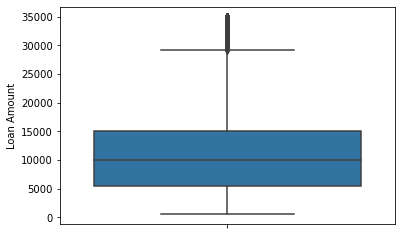

In [178]:
#Loan amount
sns.boxplot(y=loan["loan_amnt"] )
plt.ylabel('Loan Amount')
plt.show()

**The above plots show that the majority of the loan amount ranges from 5k to 15k and maximum goes upto 35k**

---------

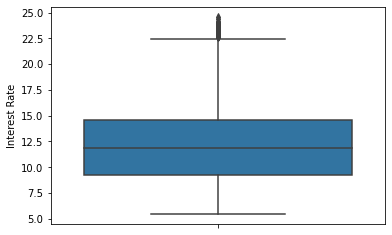

In [179]:
# Analysis on interest rate
#Loan amount
sns.boxplot(y=loan["int_rate"] )
plt.ylabel('Interest Rate')
plt.show()

**The above plots show that the majority of loan have interest rate range from 9% - 15%. Maximum it goes upto 25%**

-----------

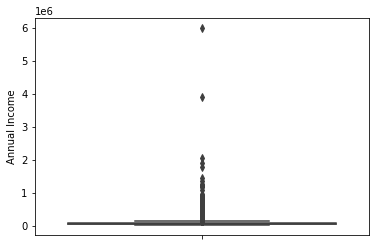

In [180]:
# Analysis on annual income
sns.boxplot(y=loan["annual_inc"] )
plt.ylabel('Annual Income')
plt.show()
# the below plot shows that there are few outliers in annual income. 
# Let's treat these outliers in order to make our analays smooth.

187000.0


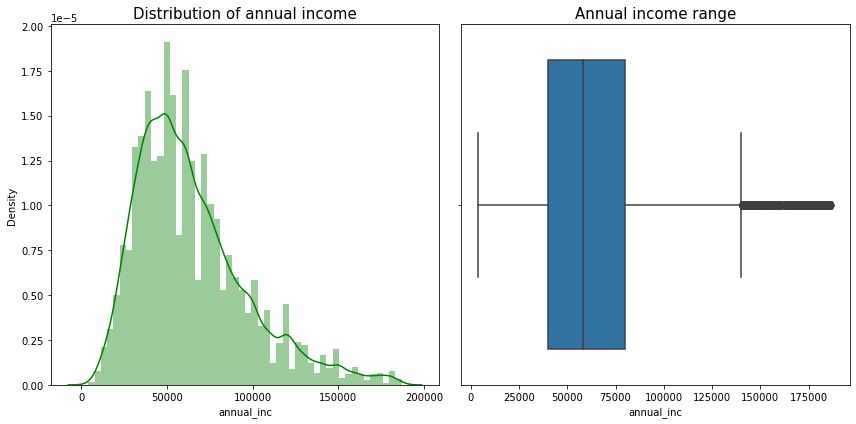

In [181]:
# marking values above 98th quantile as outliers 
outlier = loan.annual_inc.quantile(.98)
print(outlier)

loan = (loan[loan['annual_inc'] < outlier])

fig, axes = plt.subplots(1,2,figsize=(12,6))
sns.distplot(loan['annual_inc'], hist=True, kde=True, color='g', ax=axes[0])

sns.boxplot(loan['annual_inc'], ax=axes[1])
axes[0].set_title('Distribution of annual income', fontsize=15)
axes[1].set_title('Annual income range', fontsize=15)
plt.tight_layout()
plt.show()

**After treating the outliers in annual income, boxplot looks much better. Most of applicants have income less than $80000 year**

-----

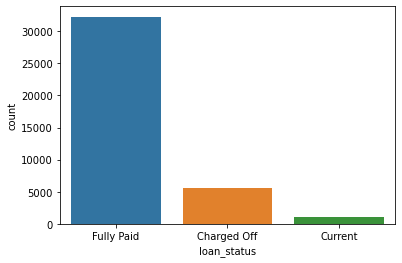

In [182]:
# Analysis on loan status 
sns.countplot(x = 'loan_status', data = loan)
plt.show()
# The below countplot  shows that around 14% of loans are "Charged Off" where applicant has not paid the instalments
# in due time for a long period of time, i.e., he/she has defaulted on the loan

###### Loan_Status = shows that around 14%(5000) of loans are Charged Off where applicant has not paid the instalments

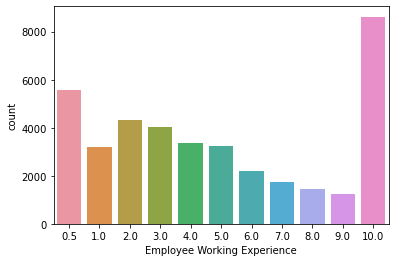

In [183]:
#employee length
sns.countplot(x='emp_length', data=loan)
plt.xlabel('Employee Working Experience')
plt.show()

###### Inference: Majority of employees applying for the loan have more than 10 years of experience

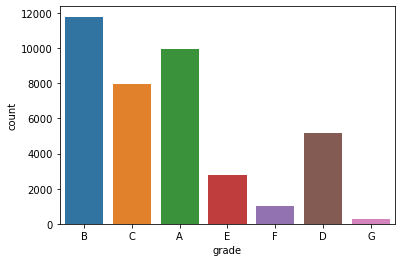

In [184]:
#Grade
sns.countplot(x='grade', data=loan)
plt.show()

Most of the loans have grade of A and B. Therefore stating most of the loans are high graded loans

In [185]:
# Dropping records where loan status is "Current". These records are not further required in our analysis.
loan = loan[loan['loan_status'] != 'Current']

## Segmented Univariate Analysis

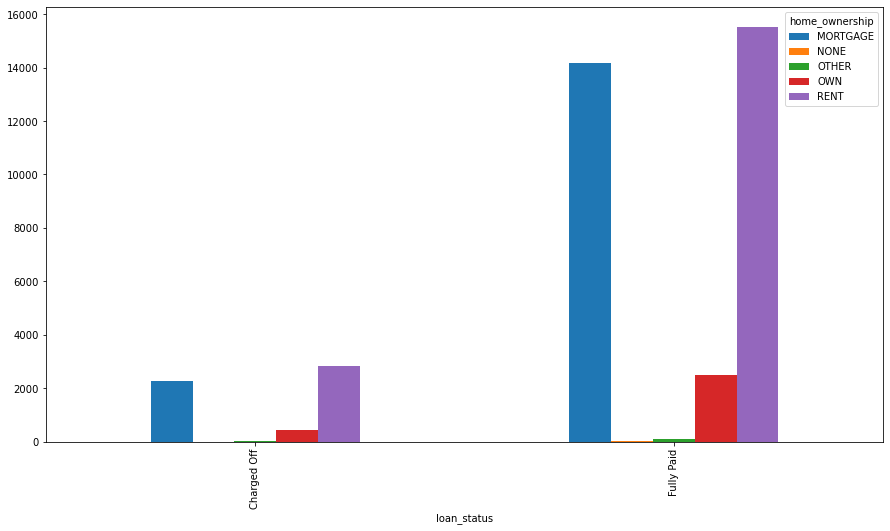

In [186]:
# Analysis on home ownership
loan.groupby('loan_status')['home_ownership'].value_counts().unstack().plot(kind='bar', figsize=[15,8])
plt.show()

**Most of the applicant's home ownership status is "Mortgage" or "Rent". This number is also high in Charged Off loans.**

--------

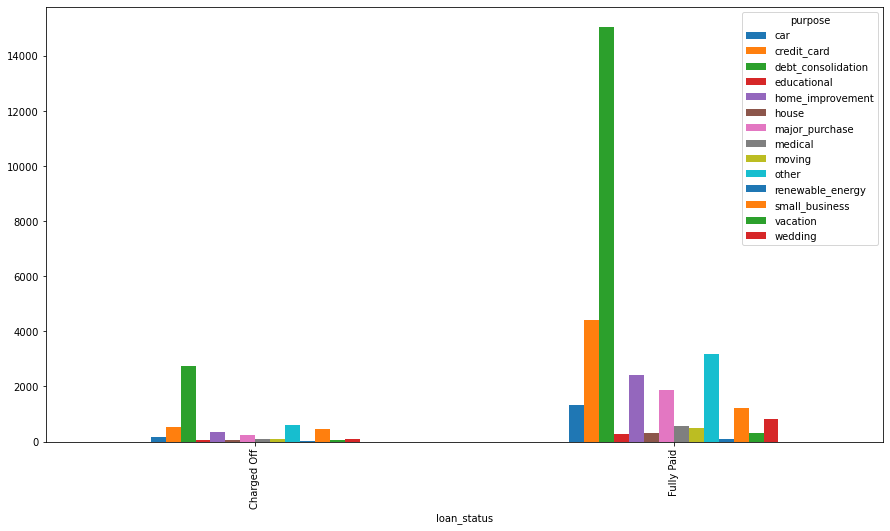

In [187]:
# Analysis on purpose
loan.groupby('loan_status')['purpose'].value_counts().unstack().plot(kind='bar', figsize=[15,8])
plt.show()

**The above plot shows that the purpose on majority of loans are debt consolidation. The number is also high on Charged Off loans.**

-----

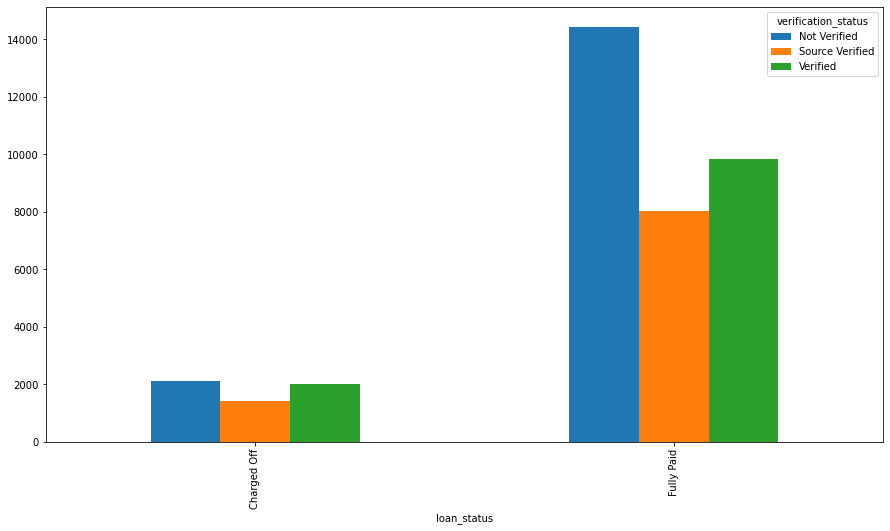

In [188]:
# Analysis on verification status
loan.groupby('loan_status')['verification_status'].value_counts().unstack().plot(kind='bar', figsize=[15,8])
plt.show()

**The above plot shows that on most of loans, income verification status is Not Verified. This number is also high on Charged Off loans.**

--------

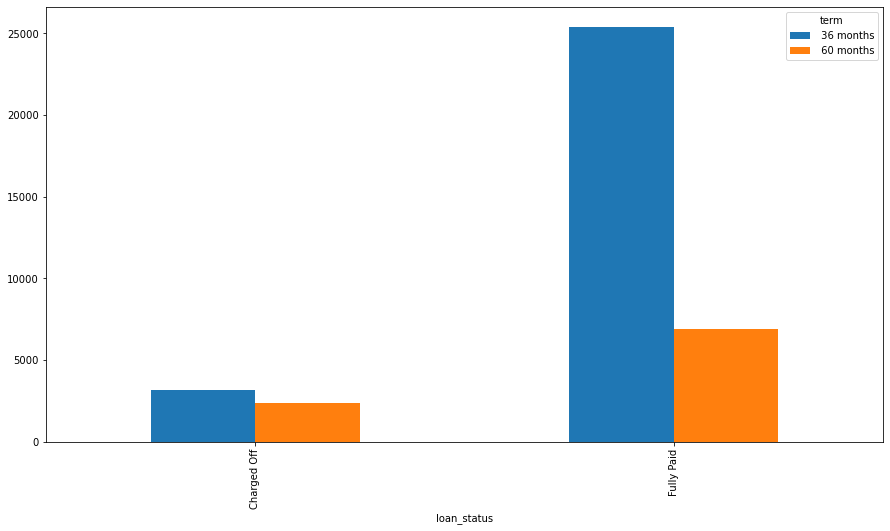

In [189]:
# Analysis on loan term
loan.groupby('loan_status')['term'].value_counts().unstack().plot(kind='bar', figsize=[15,8])
plt.show()

**Most of loans have 36 months term. This number is also high in Charged Off loans but the ratio of 60 months is higher on Charged Off as compared to 36 months.** 

-----

## Bivariate Analysis

**Since most of the data values are high in both "Fully Paid" and "Charged Off" records. It is difficult to find the driving variables behind Charged Off on the basis of count.**

<AxesSubplot:xlabel='loan_status', ylabel='int_rate'>

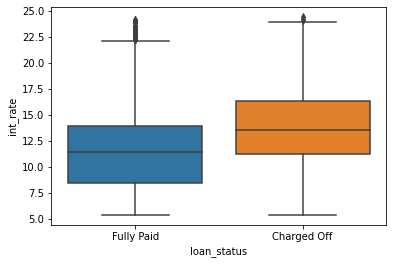

In [190]:
sns.boxplot(x = 'loan_status', y = 'int_rate', data = loan)

###### As the interest rate increases the number of defaulters also increases

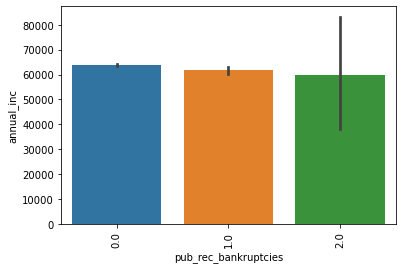

In [191]:
# Bivariate analysis on annual income.
sns.barplot(y='annual_inc', x='pub_rec_bankruptcies', data=loan)
plt.xticks(rotation=90)
plt.show()

###### Number of public record bankruptcies is high for applications having less than 60k

In [192]:
# Analysis on Loan purpose

ratio_wise = loan.pivot_table(index='purpose', columns='loan_status',
                              values='id', aggfunc=len).reset_index()

ratio_wise['Total'] = ratio_wise['Charged Off'] + ratio_wise['Fully Paid']
ratio_wise['Charged Off Ratio'] = (ratio_wise['Charged Off'] * 100)/ratio_wise['Total']
ratio_wise.sort_values(by='Charged Off Ratio', ascending=False)

loan_status,purpose,Charged Off,Fully Paid,Total,Charged Off Ratio
11,small_business,469,1227,1696,27.653302
10,renewable_energy,18,79,97,18.556701
3,educational,54,265,319,16.927900
9,other,617,3172,3789,16.283980
5,house,57,296,353,16.147309
7,medical,106,555,661,16.036309
8,moving,90,476,566,15.901060
2,debt_consolidation,2742,15036,17778,15.423557
12,vacation,53,319,372,14.247312
4,home_improvement,335,2405,2740,12.226277


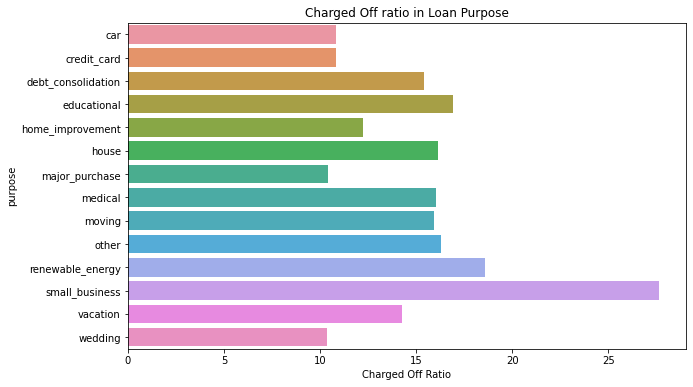

In [193]:
plt.figure(figsize=[10,6])
plt.title('Charged Off ratio in Loan Purpose')
sns.barplot(ratio_wise['Charged Off Ratio'], ratio_wise['purpose'])
plt.show()

**The above plot shows that the loan taken for Small Business purpose are likely to get Charged Off.**

---

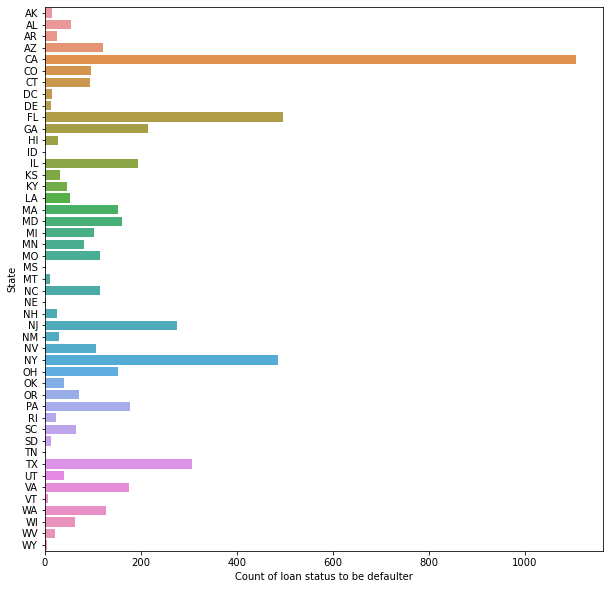

In [194]:
# Analysis on Address State

g = loan[loan['loan_status']=='Charged Off'].groupby('addr_state')['loan_status'].count().reset_index()
plt.figure(figsize=(10,10))
sns.barplot(y='addr_state', x='loan_status', data=g)
plt.xlabel('Count of loan status to be defaulter')
plt.ylabel('State')
plt.show()

Applicantions with addr_state = CA seems to have high number of defaulters

#  Summary

**Univariate Analysis**

1.Loan_Amount = majority of the loan amount ranges from 5k to 15k and maximum goes upto 35k

2.Interest_rate = majority of loan have interest rate range from 9% - 15%. Maximum it goes upto 25%

3.Annual_income = Most of applicants have income less than $80000 year

4.Loan_Status = shows that around 14%(5000) of loans are Charged Off where applicant has not paid the instalments

5.Employee work experience = Majority of employees applying for the loan have more than 10 years of experience

**Segmented Univariate Analysis**

1.home ownership = Most of the applicant's home ownership status is "Mortgage" or "Rent". This number is also high in Charged Off loans.

2.Purpose = purpose of majority loans is debt consolidation. The number is also high on Charged Off loans.

3.Verification Status = For most loans, income verification status is Not Verified. This number is also high on Charged Off loans.

4.Term = Most of loans have 36 months term. This number is also high in Charged Off loans.

**Bivariate Analysis**

1.int_rate vs loan_status = As the interest rate increases the number of defaulters also increases

2.annual_inc vs bankruptcies = Number of public record bankruptcies is high for applications having less than 60k

3.purpose vs charged_off ratio = loan taken for Small Business purpose are likely to get Charged Off.

4.address_state vs loan_status = Applicantions with addr_state = CA seems to have high number of defaulters